In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sample_submission = pd.read_csv('data/sample_submission.csv')

In [4]:
df = pd.read_csv('data/preprocessed_0815.csv')
df.head()

,realized_volatility,seconds_count,seconds_right_skew,seconds_skewness,seconds_kurtosis,wap_skewness,wap_kurtosis,bid_size1_skewness,bid_size1_max,bid_size1_mean,ask_size1_skewness,ask_size1_max,ask_size1_mean,bid_size2_skewness,ask_size2_skewness,row_id,size_max,size_sum,order_count_max,target
0,0.004499,302.0,152.841727,0.510418,-1.181185,-0.853924,3.512603,-0.803095,500.0,78.264901,-0.246879,228.0,74.579470,-0.669089,-0.426180,0-5,499.0,3179.0,12.0,0.004136
1,0.001204,200.0,147.965217,-0.362378,-1.001272,0.091449,0.511806,0.288387,402.0,149.965000,1.345276,400.0,71.145000,1.269870,-0.172575,0-11,280.0,1289.0,6.0,0.001445
2,0.002369,188.0,159.897059,0.506732,-1.216982,-0.960020,-0.131697,-0.164424,304.0,96.132979,1.279381,449.0,131.037234,0.538682,-1.122790,0-16,391.0,2161.0,8.0,0.002168
3,0.002574,120.0,120.509434,-0.032548,-1.013334,0.692342,-0.116943,0.448781,370.0,114.458333,0.480632,400.0,120.800000,1.293843,0.790816,0-31,450.0,1962.0,15.0,0.002195
4,0.001894,176.0,131.988764,-0.402382,-1.151718,0.377272,-1.027612,0.579404,402.0,119.823864,0.121758,333.0,88.477273,-0.434153,1.519461,0-62,341.0,1791.0,17.0,0.001747


#### 앙상블 기법 활용할 예정

#### 1. 많은 독립변수를 활용해서, 하이퍼 파라미터 튜닝한 후 RF, XGB, LIGHTGBM 해보기
#### 2. 적은 독립변수를 활용해서, 하이퍼 파라미터 튜닝한 후 RF, XGB, LIGHTGBM 해보기

In [17]:
# 1번 할 예정
# Random Forest, XGBRegressor, LightGBM 사용하기
# Scaling is not needed

In [7]:
# 0. train~test split & preprocessing

# 0-1. Which Variables are used?
# a. realized_volatility
# b. anything that has the lowest correlation with realize_volatility

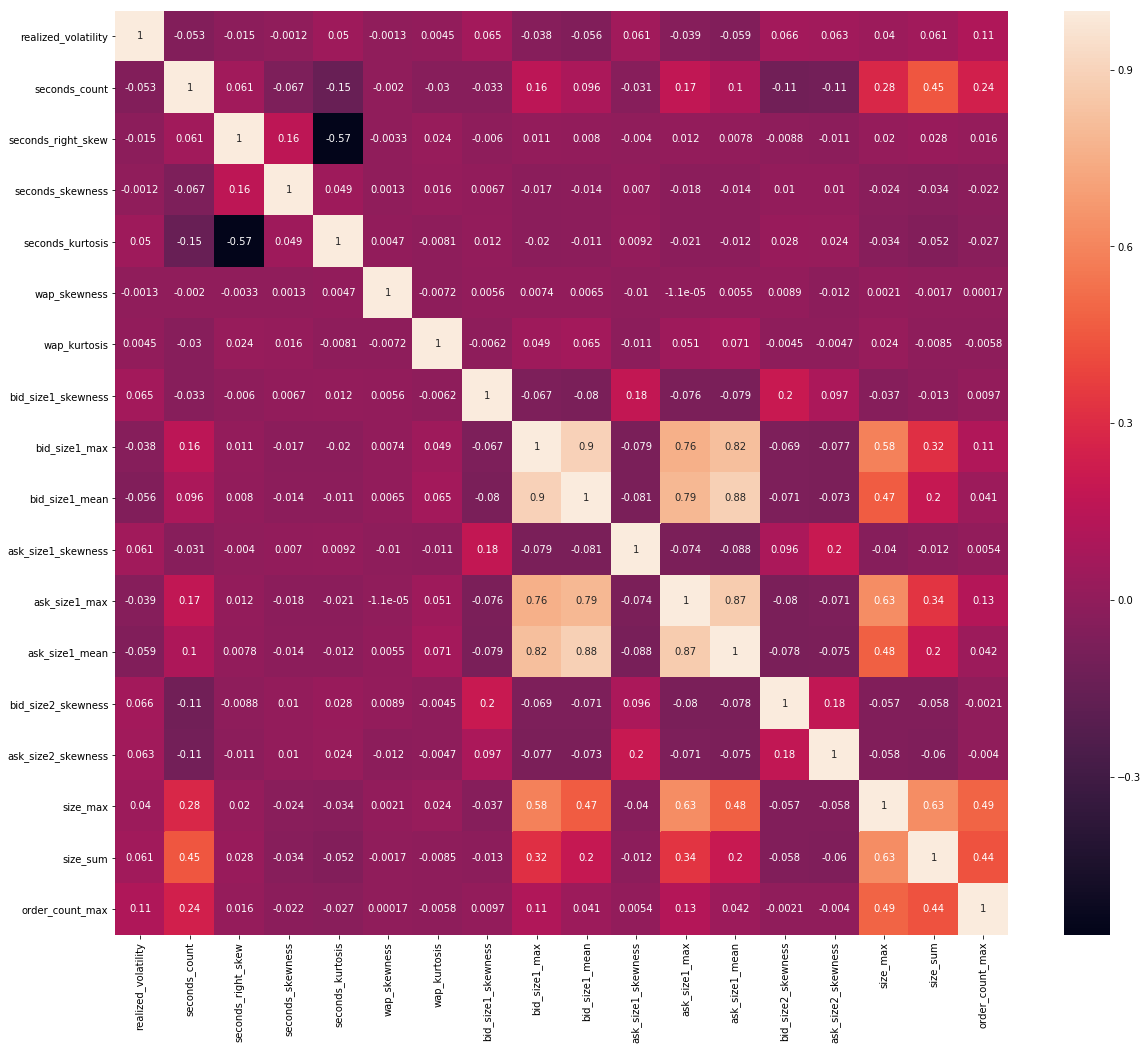

In [9]:
plt.figure(figsize = (20, 17))
sns.heatmap(df.drop(['row_id','target'], axis=1).corr(), annot = True)
plt.show()

In [10]:
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_cols = list(df.drop(['row_id','target'], axis=1).columns)
features = '+'.join(df_cols)

y, X = dmatrices('target~'+features, data=df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns

In [11]:
# Safe : VIF < 5
# Careful : 5 < VIF < 10
# Danger : 10 < VIF

vif.round(1)

,VIF_factor,features
0,302.6,Intercept
1,1.0,realized_volatility
2,1.3,seconds_count
3,1.6,seconds_right_skew
4,1.1,seconds_skewness
5,1.6,seconds_kurtosis
6,1.0,wap_skewness
7,1.0,wap_kurtosis
8,1.1,bid_size1_skewness
9,6.3,bid_size1_max


In [12]:
# High VIF(Careful) : bid_size1_max, bid_size1_mean, ask_size1_max, ask_size1_mean
# Without these 4 variables, Calculate VIF again.

In [15]:
df_cols = list(df.drop(['row_id','bid_size1_max', 'bid_size1_mean', 
                        'ask_size1_max', 'ask_size1_mean','target'], axis=1).columns)
features = '+'.join(df_cols)

y, X = dmatrices('target~'+features, data=df, return_type = 'dataframe')
vif = pd.DataFrame()
vif['VIF_factor'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['features'] = X.columns
vif.round(1)

,VIF_factor,features
0,302.5,Intercept
1,1.0,realized_volatility
2,1.3,seconds_count
3,1.6,seconds_right_skew
4,1.1,seconds_skewness
5,1.6,seconds_kurtosis
6,1.0,wap_skewness
7,1.0,wap_kurtosis
8,1.1,bid_size1_skewness
9,1.1,ask_size1_skewness


In [16]:
# With 14 variables, fit RF, XGB, LightGBM

In [22]:
vif.features.unique()

array(['Intercept', 'realized_volatility', 'seconds_count',
       'seconds_right_skew', 'seconds_skewness', 'seconds_kurtosis',
       'wap_skewness', 'wap_kurtosis', 'bid_size1_skewness',
       'ask_size1_skewness', 'bid_size2_skewness', 'ask_size2_skewness',
       'size_max', 'size_sum', 'order_count_max'], dtype=object)